In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from scipy import stats
from pathlib import Path, PureWindowsPath

In [4]:
def extract_dataset_info(data_path):
    # extract information from train.txt
    f = open(os.path.join(data_path, "train.txt"), "r")
    contents_train = f.readlines()
    label_classes, label_train_list, img_train_list = [], [], []
    for sample in contents_train:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        if label not in label_classes:
            label_classes.append(label)
        label_train_list.append(sample[0])
        img_train_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))
    print('Classes: {}'.format(label_classes))

    # extract information from test.txt
    f = open(os.path.join(data_path, "test.txt"), "r")
    contents_test = f.readlines()
    label_test_list, img_test_list = [], []
    for sample in contents_test:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        label_test_list.append(label)
        img_test_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))  # you can directly use img_path if you run in Windows

    return label_classes, label_train_list, img_train_list, label_test_list, img_test_list

In [5]:
def get_tiny_image(img, output_size):
    # To do
    feature = cv2.resize(img, output_size, interpolation = cv2.INTER_AREA)    
    return feature

In [49]:
def normalize_img(feature_vec):
    img_nonzeromean = np.array(feature_vec)
    img_nonunit = img_nonzeromean
    img_final = np.zeros(img_nonzeromean.shape)

    img_ave = np.mean(img_nonzeromean)

    img_nonunit = img_nonzeromean - img_ave

    for i in range(len(img_nonzeromean)):
        img_final[i,:] = img_nonunit[i,:]/np.linalg.norm(img_nonunit[i,:])
    
    return img_final
    

In [6]:
label_classes, label_train_list, img_train_list, label_test_list, img_test_list = extract_dataset_info("./scene_classification_data")

Classes: ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb', 'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast', 'Mountain', 'Forest']


In [7]:
label_train_list[0]

'Kitchen'

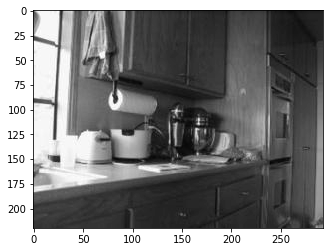

In [52]:
img = cv2.imread(img_train_list[0],0)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [100]:
k = 10
output_size= (16,16)
feature_vec = []
for name in img_train_list :
    img = cv2.imread(name,0)
    feature = get_tiny_image(img, output_size)
    feature_vec.append( feature.reshape(np.prod(feature.shape)))

In [101]:
feature_test_vec = []
for name in img_test_list :
    img = cv2.imread(name,0)
    feature_test = get_tiny_image(img, output_size)
    feature_test_vec.append( feature_test.reshape(np.prod(feature_test.shape)))

In [102]:
img_train_final = normalize_img(feature_vec)
img_test_final = normalize_img(feature_test_vec)

In [103]:
label_train_set = []
for item in label_train_list:
    label_train_set.append(label_classes.index(item))
    
label_train_set = np.array(label_train_set)
print(label_train_set)


[ 0  0  0 ... 14 14 14]


In [104]:
img_test_final

array([[-0.02611913, -0.00044144,  0.01056328, ..., -0.01511441,
        -0.06280154, -0.06891528],
       [-0.07142054, -0.05958831, -0.05958831, ...,  0.06819976,
         0.05045141,  0.01850439],
       [-0.03449151, -0.01452097,  0.01602223, ...,  0.03951699,
         0.05126437,  0.03834225],
       ...,
       [-0.104836  , -0.06053569,  0.02234876, ..., -0.10340696,
        -0.10626504, -0.11341025],
       [-0.0540451 , -0.04235462, -0.04402469, ..., -0.1158376 ,
        -0.15090902, -0.11416753],
       [-0.093109  , -0.15283156, -0.07967143, ..., -0.10356045,
        -0.03637257, -0.02741418]])

In [105]:
nbrs = NearestNeighbors(algorithm='auto').fit(img_train_final)
    
distances, indices =nbrs.kneighbors(img_test_final,n_neighbors=k)

In [106]:
print(indices)
print(indices[0,:])
counts = np.bincount(label_train_set[indices[0,:]])
print(counts)
print(np.argmax(counts))

#label_predict =

[[1204 1301 1480 ...  596 1238  922]
 [ 923  612   80 ...  257  664   93]
 [1286 1255 1047 ...  695 1098  617]
 ...
 [ 900 1271 1399 ... 1298  884 1467]
 [1454  859  574 ... 1373 1486  541]
 [1203 1295  310 ...  494 1212 1115]]
[1204 1301 1480  187 1090 1188 1464  596 1238  922]
[0 1 0 0 0 1 0 0 0 1 1 1 2 1 2]
12


In [107]:
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(img_train_final) 
NearestNeighbors(algorithm='auto')
print(neigh.kneighbors(np.array([img_test_final[0,:]]))) 


print(neigh.kneighbors(np.array([img_test_final[56,:]]))) 

(array([[0.9610388 , 0.97003322, 1.01352152, 1.03624887, 1.04183994,
        1.04429581, 1.05533836, 1.07150054, 1.07483652, 1.09709347]]), array([[1204, 1301, 1480,  187, 1090, 1188, 1464,  596, 1238,  922]],
      dtype=int64))
(array([[0.63628991, 0.65817937, 0.67815877, 0.70817224, 0.71168275,
        0.73516612, 0.74455612, 0.75464862, 0.75732021, 0.76492793]]), array([[ 820,   52, 1271,  980,  953,  886,  914,  956, 1467,  955]],
      dtype=int64))
